# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-24 22:46:51.691056: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-24 22:46:51.691231: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 22:46:51.693498: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 22:46:51.719522: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 22:46:52.238800: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 6000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=1, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 10.317%
Epoch 2/5: accuracy 10.167%
Epoch 3/5: accuracy 10.750%
Epoch 4/5: accuracy 10.517%
Epoch 5/5: accuracy 10.617%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-6  4  4 ... -5  5 -7]
 [-4 -4 -8 ... -4 -4  4]] ...

 [[-6  4  5 ... -7  6 -4]
 [ 5  5  5 ...  8 -3 -4]
 [-3 -7 -4 ...  8 -3  5]
 ...
 [-7 -7  5 ... -4 -2  5]
 [-4 -8 -4 ...  4  4 -4]
 [ 8 -7  7 ...  7  7  7]]

 [[ 5  5 -6 -4  7 -3  8  5  5  5 -6  8  8 -5  8  5 -5 -5  6  8  7  5  5  5
  -2  5  5 -6  5 -7  6 -6 -2  5  5  8 -3  8  8 -2 -6 -4 -4 -3  8  5 -2 -3
   5  5 -2 -6  5  6  5  8  6  5 -5 -6 -4 -2 -4  5  8 -5  8 -5 -5 -4 -4  5
  -6 -5  5  5 -5 -3  5 -2 -2 -3 -2  5  5 -7  8  6 -5 -2  8 -2  8  6  5  8
  -6 -2  5  5  6 -4 -2 -2 -5 -6 -6 -5 -6  8 -4 -7 -6 -2 -7 -2 -3 -4 -5  7
   5 -3 -7 -4  6 -3 -2 -4]
 [ 6  5  5  5  5  8  5  5  5  5  5  6  5 -4  8  5 -3  5 -3 -3 -7 -3 -4  5
   8 -3  8 -3  5  8  8  6  5 -3 -4 -3  8  5  5  7  5 -6  5  5 -3  5 -4  8
   6  6  5 -3  5  5 -3  5  6 -5  5 -3  8 -4 -5  8  8 -4  8 -3  8  5  5  5
   7  5 -3  5 -3 -3  5  5 -5  7  5 -3  6  5  6 -7 -3 -3  8  5  8  5  5  5
   6 -4 -5 -4 -7 -5  5 -6 -3 -6  5  5 -4  8  5 -4  5  5  7 -6  5 -7 -3  8
   5  5 -3  6  8


 [  0   0   0   0   0   0   0   0   0   0   0 255   0 255 255   0   0   0
   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 255   0 255   0   0   0   0 255   0   0   0   0   0   0   0 255   0   0
   0   0   0 255 255 255 255   0   0 255   0   0   0   0   0   0   0   0
   0 254   0 255   0   0   0 255   0   0  95 255   0 255   0   0 255   0
   0   0   0   2   0   0 255   0   0   0   0   0   0   0 170   0   0   0
   0   0   0   0   0   0  67   0   0   0   0   0 255 255   0   0 255   0
   0   0]

 [  0  91 101   0   0   0   0   0  61  92 111   0   0   0   0   0  51  95
 135  13   0  57  41   0  85  35   0   0   0   0 101   0   0 117   0 142
   0   0  13 108  71   0 183  84   0   0 124   0  72   0 105   0  69 143
   0   0 111  64   0   0  83  99  89  89   0  94  24   3  60  74   0  27
   0   0 123   0   0   0 114   0   0 102   0   0  53  83   0   0   0   0
 147   0   0   0 156  94   0   0 170   0  82 168 122   0   2   0   0   0
   0   0 108   0 116   0   0   0   0 

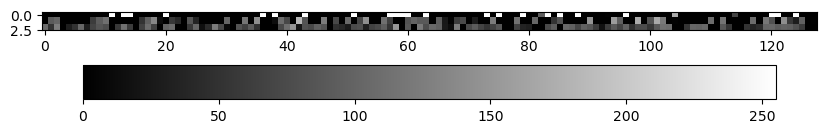


 [ 70 147  92   0   4  18 115 124 136  70]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
print("\n", model.last_intermediate_outputs[1])
print("\n", model.last_intermediate_outputs[2])
plt.show()
print("\n", model.last_outputs)